# Análise dos dados da Capo do Mundo 
Com base na página sobre a Copa do Mundo na Wikipedia vamos obter os dados
de público pagante em cada final

Link -> https://pt.wikipedia.org/wiki/Copa_do_Mundo_FIFA

In [1]:
# importando bibliotecas
import pandas as pd
import requests

In [2]:
# URL
url = 'https://pt.wikipedia.org/wiki/Copa_do_Mundo_FIFA'

# Requisição dos dados da API
resposta = requests.get(url)

# Exibir 
resposta.text

'<!DOCTYPE html>\n<html class="client-nojs" lang="pt" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Copa do Mundo FIFA – Wikipédia, a enciclopédia livre</title>\n<script>document.documentElement.className = document.documentElement.className.replace( /(^|\\s)client-nojs(\\s|$)/, "$1client-js$2" );</script>\n<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Copa_do_Mundo_FIFA","wgTitle":"Copa do Mundo FIFA","wgCurRevisionId":52819520,"wgRevisionId":52819520,"wgArticleId":6133,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Páginas que usam Timeline","!CS1 inglês-fontes em língua (en)","!Páginas que usam hiperligações mágicas ISBN","!Artigos destacados na Wikipédia em letão","!Artigos destacados na Wikipédia em scots","!Artigos destacados na Wikipédia em tailandês","!Artigos destacados na Wikipédia em ind

In [3]:
# Obter a resposta em formato HTML
table = pd.read_html(resposta.text)

# Vamos ver o resultado
table

[                                                    0  \
 0                                  Copa do Mundo FIFA   
 1                                        Dados gerais   
 2                                         Organização   
 3                                             Edições   
 4                                    Local de disputa   
 5                                             Sistema   
 6   Dados históricos  Primeiro vencedor  Uruguai (...   
 7                                    Dados históricos   
 8                                   Primeiro vencedor   
 9                                     Último vencedor   
 10  Estatísticas  Total de gol(o)s 2 548  Total de...   
 11                                       Estatísticas   
 12                                   Total de gol(o)s   
 13                                     Total de jogos   
 14                                              Média   
 15                                       Edição atual   
 16           

In [4]:
# Queremos apenas a tabela com os pagantes po final
# Essa é a 12 tabela

# Então o DataFrame será apenas a tabela 12
df = table[11]

df.head()

,0,1,2,3,4
0,Edição,Ano,Estádio,Local,Público pagante
1,I,1930,Estádio Centenário,Montevidéu,68.346
2,II,1934,Estádio do Partido Nacional Fascista,Roma,55.000
3,III,1938,Estádio Olímpico Yves-du-Manoir,Colombes,45.000
4,IV,1950,Estádio do Maracanã,Rio de Janeiro,173.850


In [5]:
# Mudar a nome das colunas usando a primeira linha
df.columns = df.iloc[0]

df.head()

,Edição,Ano,Estádio,Local,Público pagante
0,Edição,Ano,Estádio,Local,Público pagante
1,I,1930,Estádio Centenário,Montevidéu,68.346
2,II,1934,Estádio do Partido Nacional Fascista,Roma,55.000
3,III,1938,Estádio Olímpico Yves-du-Manoir,Colombes,45.000
4,IV,1950,Estádio do Maracanã,Rio de Janeiro,173.850


In [6]:
# Apagar a primeira linha
# inplace para apagar na prática
df.drop(df.index[0], inplace=True)

df.head()

,Edição,Ano,Estádio,Local,Público pagante
1,I,1930,Estádio Centenário,Montevidéu,68.346
2,II,1934,Estádio do Partido Nacional Fascista,Roma,55.000
3,III,1938,Estádio Olímpico Yves-du-Manoir,Colombes,45.000
4,IV,1950,Estádio do Maracanã,Rio de Janeiro,173.850
5,V,1954,Estádio Wankdorf,Berna,62.500


In [7]:
# Vamos os tipos das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 1 to 21
Data columns (total 5 columns):
Edição             21 non-null object
Ano                21 non-null object
Estádio            21 non-null object
Local              21 non-null object
Público pagante    21 non-null object
dtypes: object(5)
memory usage: 1008.0+ bytes


In [8]:
# Converter Público pagante em int
# Error por causa do ponto
df['Público pagante'] = df['Público pagante'].astype(int)

ValueError: invalid literal for int() with base 10: '68.346'

In [9]:
# Converter Público pagante em int
df['Público pagante'] = df['Público pagante'].str.replace('.', '').astype(int)


# Vamos verificar se deu certo
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 1 to 21
Data columns (total 5 columns):
Edição             21 non-null object
Ano                21 non-null object
Estádio            21 non-null object
Local              21 non-null object
Público pagante    21 non-null int32
dtypes: int32(1), object(4)
memory usage: 924.0+ bytes


In [11]:
# Gráfico da evolução do público pagante

# importando nova biblioteca gráfica
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar o matplotlib
%matplotlib inline

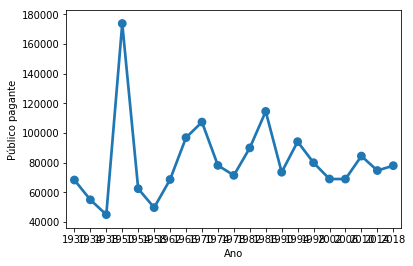

In [12]:
# Exibindo o gráfico de linhas com marcação em cada ponto
sns.pointplot(x='Ano', y='Público pagante', data=df)

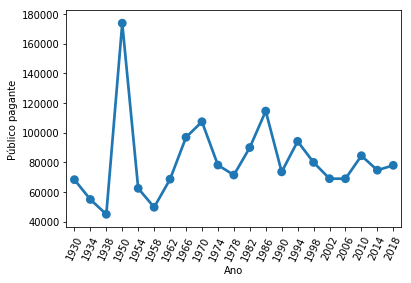

In [13]:
# Exibindo o gráfico de linhas com marcação em cada ponto
sns.pointplot(x='Ano', y='Público pagante', data=df)

# Ajustar as lengendas
plt.xticks(rotation=65)
plt.show()